In [1]:
%matplotlib inline

import pandas as pd
import math
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import islice 
from numpy import random
from sklearn import tree
from sklearn import model_selection
from sklearn.inspection import DecisionBoundaryDisplay

In [60]:
def square(val):
    return math.pow(val,2)

def gini_perf(ldf,column, threshold):
    moy=[]
    for species in ldf.values[4]:
    
        is_type_inf=len([i for i in ldf.values if i[4] == species and i[column] < threshold ])
        is_not_type_inf=len([i for i in ldf.values if i[4] != species and i[column] < threshold ])
        is_type_sup=len([i for i in ldf.values if i[4] == species and i[column] > threshold ])
        is_not_type_sup=len([i for i in ldf.values if i[4] != species and i[column] > threshold ])
    
        inf_somme=is_type_inf+is_not_type_inf
        sup_somme=is_type_sup+is_not_type_sup
    
        if inf_somme!=0 :
            gini_inf=1-(square(is_type_inf/inf_somme)+square(is_not_type_inf/inf_somme))
        else:
            gini_inf=1
        if sup_somme!=0 :
            gini_sup=1-(square(is_type_sup/sup_somme)+square(is_not_type_sup/sup_somme))
        else:
            gini_sup=1
        
        moy+=[(gini_inf+gini_sup)/2]
    
    return moy

def print_from_dataframe(df):
    sns.pairplot(df,hue='species', height=2.5)
    
def train_test_split(df):
    X=np.array([df.sepal_length, df.sepal_width, df.petal_length, df.petal_width]).T
    Y=np.array(df.species)
    return (X, Y, model_selection.train_test_split(X, Y, test_size=0.33, random_state=42))

def train_model(X,Y):
    clf=tree.DecisionTreeClassifier()
    return clf.fit(X, Y)

def print_decision_surface(X,Y,plot_colors="ryb",plot_step = 0.02):
    n_classes = 3

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
        # Train
        clf = tree.DecisionTreeClassifier().fit(X[:, pair], Y)
    
        # Plot the decision boundary
        ax = plt.subplot(2, 3, pairidx + 1)
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
        DecisionBoundaryDisplay.from_estimator(
            clf,
            X[:, pair],
            cmap=plt.cm.RdYlBu,
            response_method="predict",
            ax=ax,
            #xlabel=iris.feature_names[pair[0]],
            #ylabel=iris.feature_names[pair[1]],
        )

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(
                X[:, pair][idx, 0],
                X[:, pair][idx, 1],
                c=color,
                #label=iris.target_names[i],
                cmap=plt.cm.RdYlBu,
                edgecolor="black",
                s=15,
            )

    plt.suptitle("Decision surface of decision trees trained on pairs of features")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _=plt.axis("tight")

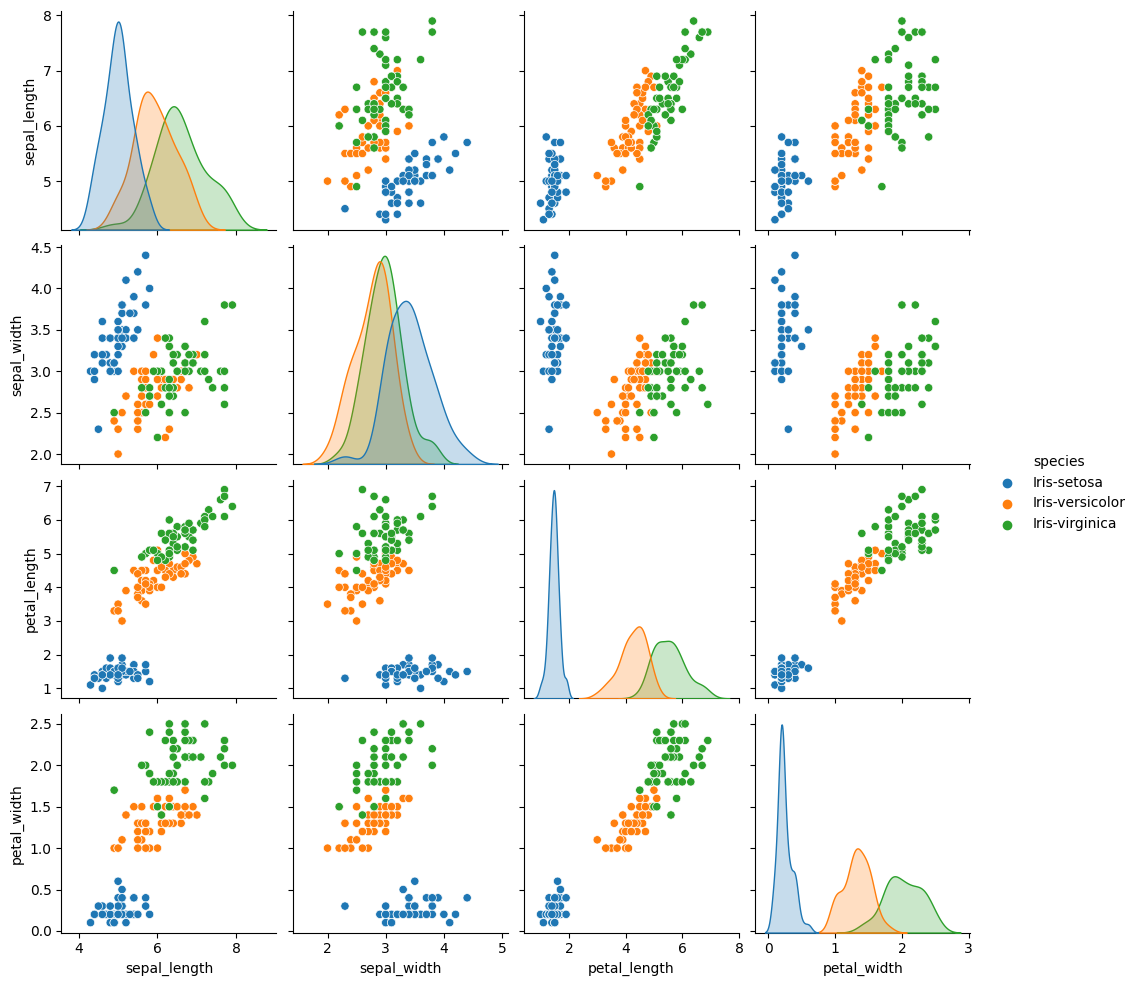

In [3]:
iris= pd.read_csv('iris.data',sep=',') #https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris_df = pd.DataFrame(np.array(iris),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print_from_dataframe(iris_df)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


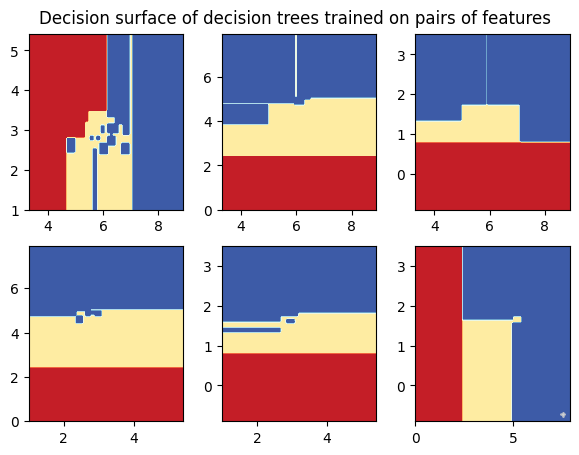

In [4]:
X, Y, (X_train, X_test, Y_train, Y_test) = train_test_split(iris_df)
print_decision_surface(X, Y)

[Text(0.5, 0.875, 'X[2] <= 4.75\ngini = 0.665\nsamples = 99\nvalue = [30, 35, 34]'),
 Text(0.25, 0.625, 'X[2] <= 2.45\ngini = 0.498\nsamples = 64\nvalue = [30, 34, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.75, 0.625, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.375, 'X[0] <= 6.2\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

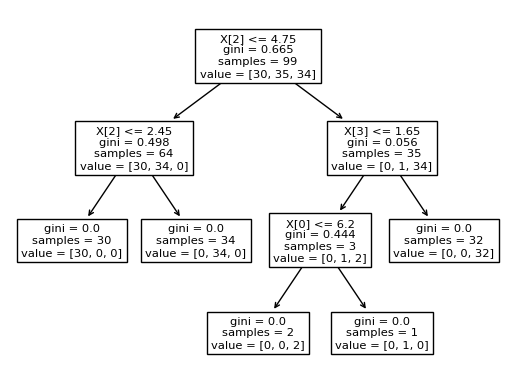

In [5]:
X, Y, (X_train, X_test, Y_train, Y_test) = train_test_split(iris_df)
clf = train_model(X_train, Y_train)
tree.plot_tree(clf)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,6.3,3.3,6.0,2.5,Iris-virginica
3,5.8,2.7,5.1,1.9,Iris-virginica
4,7.0,3.2,4.7,1.4,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor


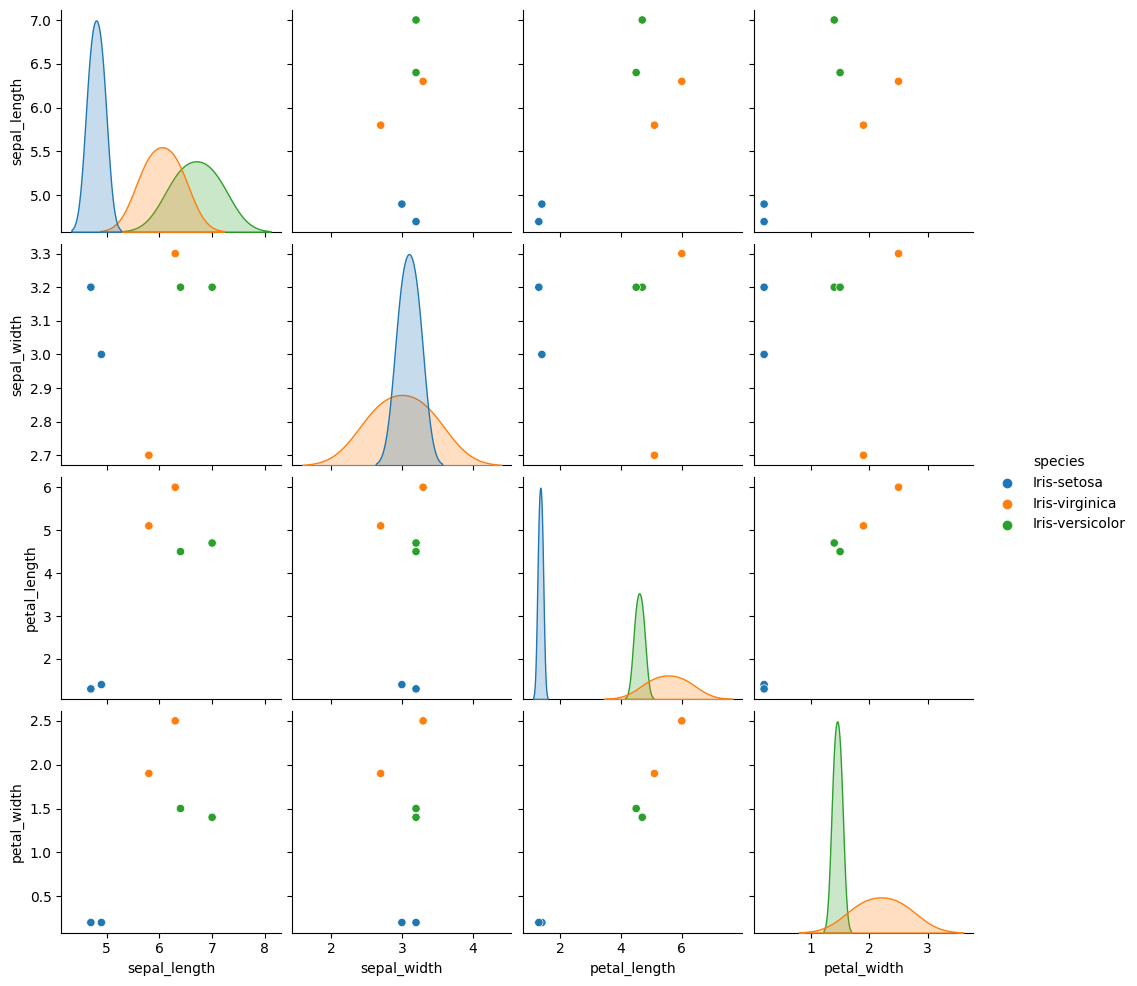

In [16]:
simple_iris=[]
i_setosa=[i for i in iris_df.values if i[4] == "Iris-setosa"]
i_virginica=[i for i in iris_df.values if i[4] == "Iris-virginica"]
i_versicolor=[i for i in iris_df.values if i[4] == "Iris-versicolor"]
simple_iris+=i_setosa[:2]
simple_iris+=i_virginica[:2]
simple_iris+=i_versicolor[:2]


simple_iris_df = pd.DataFrame(simple_iris,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print_from_dataframe(simple_iris_df)
simple_iris_df

In [42]:
simple_iris_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,6.3,3.3,6.0,2.5,Iris-virginica
3,5.8,2.7,5.1,1.9,Iris-virginica
4,7.0,3.2,4.7,1.4,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor


In [43]:
I_gini_species= 1- (square(2/6)+square(2/6)+square(2/6))
print("indice de gini var a expliqué (species): {}".format(I_gini_species))

#threshold < 5 e=4
I_gini_petal_length_setona_inf= 1-(square(2/4)+square(2/4))
print("indice de gini var a explicative (petal_length) pour setona: {}".format(I_gini_petal_length_setona))

I_gini_petal_length_virginica_inf= 1-(square(0/4)+square(4/4))
print("indice de gini var a explicative (petal_length) pour virginica: {}".format(I_gini_petal_length_virginica))

I_gini_petal_length_versicolor_inf= 1-(square(2/4)+square(2/4))
print("indice de gini var a explicative (petal_length) pour versicolor: {}".format(I_gini_petal_length_versicolor))


#threshold > 5 e=2
I_gini_petal_length_setona_sup= 1-(square(0/2)+square(2/2))
print("indice de gini var a explicative (petal_length) pour setona: {}".format(I_gini_petal_length_setona))

I_gini_petal_length_virginica_sup= 1-(square(2/2)+square(0/2))
print("indice de gini var a explicative (petal_length) pour virginica: {}".format(I_gini_petal_length_virginica))

I_gini_petal_length_versicolor_sup= 1-(square(0/2)+square(2/2))
print("indice de gini var a explicative (petal_length) pour versicolor: {}".format(I_gini_petal_length_versicolor))


I_gini_petal_length_setona=(I_gini_petal_length_setona_inf+I_gini_petal_length_setona_sup)/2
I_gini_petal_length_virginica=(I_gini_petal_length_virginica_inf+I_gini_petal_length_virginica_sup)/2
I_gini_petal_length_versicolor=(I_gini_petal_length_versicolor_inf+I_gini_petal_length_versicolor_sup)/2

I_gini_petal_length= I_gini_species - (I_gini_petal_length_setona+I_gini_petal_length_virginica+I_gini_petal_length_versicolor)
print("indice de gini var a explicative (petal_length): {}".format(I_gini_petal_length))




indice de gini var a expliqué (species): 0.6666666666666667
indice de gini var a explicative (petal_length) pour setona: 0.25
indice de gini var a explicative (petal_length) pour virginica: 0.0
indice de gini var a explicative (petal_length) pour versicolor: 0.25
indice de gini var a explicative (petal_length) pour setona: 0.25
indice de gini var a explicative (petal_length) pour virginica: 0.0
indice de gini var a explicative (petal_length) pour versicolor: 0.25
indice de gini var a explicative (petal_length): 0.16666666666666674


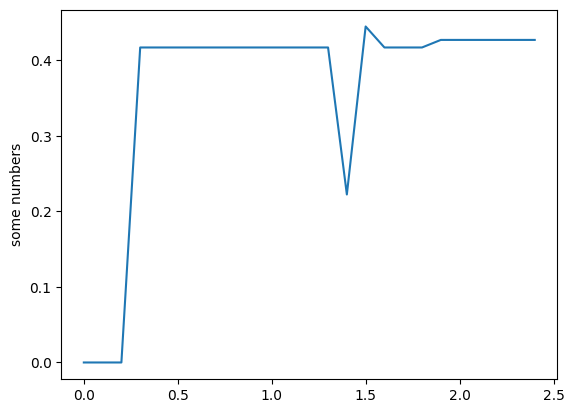

[[0.50666667 0.50666667 0.50666667 0.50666667 0.50666667 0.50666667
  0.50666667 0.50666667 0.50666667 0.50666667 0.50666667 0.50666667
  0.50666667 0.50666667 0.50666667 0.50666667 0.50666667 0.50666667
  0.50666667 0.50666667 0.50666667 0.50666667 0.50666667 0.50666667
  0.50666667]
 [0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667]
 [0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667 0.42666667 0.42666667 0.42666667 0.42666667 0.42666667
  0.42666667]
 [0.         0.         0.         0.41666667 0.41666667 0.41666667
  0.41666667 0.41666667 0.41666667 0.41666667 0.41666667 0.41666667
  0.41

In [142]:
result_gini=[[],[],[],[]]
rg=np.arange(0,2.5,.1)

for dyn_threshold in rg:
    #[5,3.1,2.95,1.75]
    for var_id,threshold in enumerate([6.5,2.8,5.5,dyn_threshold]):
        I_gini_species_from_species=[]
        perf=gini_perf(simple_iris_df,var_id,threshold)
        result=I_gini_species-sum(perf)
        if result<-2 :
            result_gini[var_id].append(0)
        else:
            result_gini[var_id].append(result)


        
plt.plot(np.array(rg),np.array(result_gini)[3].T)
plt.ylabel('some numbers')
plt.show()        
print(np.array(result_gini))        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


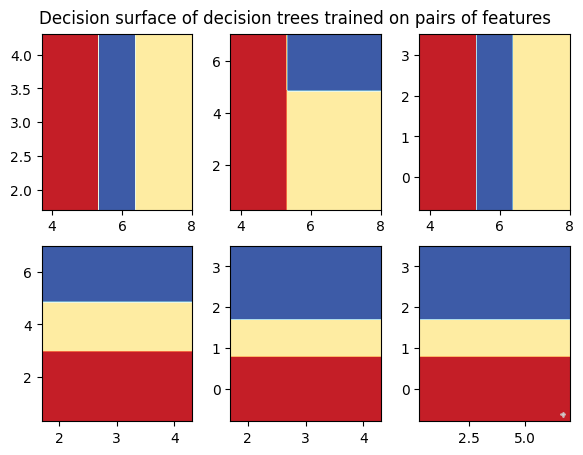

In [143]:
X, Y, (X_train, X_test, Y_train, Y_test) = train_test_split(simple_iris_df)
print_decision_surface(X, Y)

[Text(0.4, 0.8333333333333334, 'X[0] <= 5.35\ngini = 0.667\nsamples = 6\nvalue = [2, 2, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.9\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

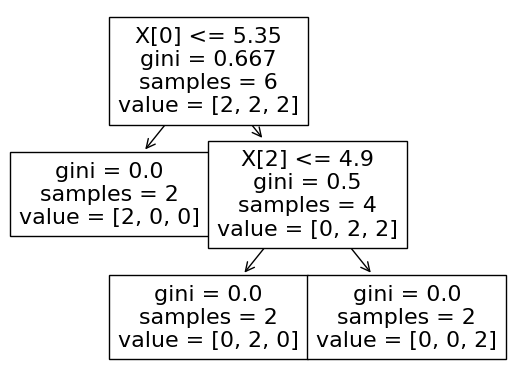

In [129]:

clf = train_model(X, Y)
tree.plot_tree(clf)
